## $y=x^{x^{x^{x\cdots}}}$をちゃんと考えたいです！


#### はじめに

生徒からの質問をM先生経由で聞きました。

$y=x^{x^{x^{x\cdots}}}$のグラフですが，

$y=x^y$と考えて書いていきます。

$$x=y^{\frac1y}=\exp\left(\log y^\frac1y\right)=\exp\left(\frac{\log y}y\right)$$
なので，

$$x'=\exp\left(\frac{\log y}y\right)\cdot\frac{1-\log y}{y^2}$$

増減・極限などをまとめると，

|$y$|$(0)$|$\cdots$|$e$|$\cdots$|$(\infty)$|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$x'$||$+$|$0$|$-$||
|$x$|$(0)$|$\nearrow$|$e^{\frac1e}$|$\searrow$|$(1)$|

グラフは次のようになります。

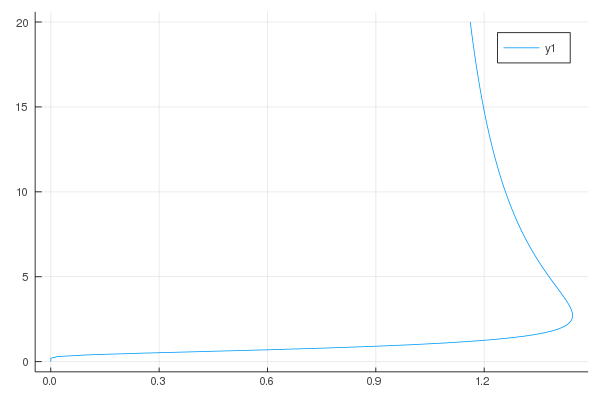

In [31]:
h(y)=y^(1/y)
y=0:.1:20
x=[h(i) for i in y]
using Plots
plot(x,y)

『$1<x\leqq e^{\frac1e}$のとき，$y$の値は2つあるのでどっちなのでしょうか？』

という質問でした。面白そうなので考えてみることにしました。

#### 関数の定義

$x$が大きくなると発散するので，まずは定義域の設定が必要だと思いました。
まずは関数を定義することから始めます。
$$f_1(x)=x,\,f_{n+1}(x)=x^{f_n(x)}=\exp(f_n(x)\log x)$$

として，
$$f(x)=\lim_{n\to\infty}f_n(x)$$
と定義します。そして，各実数xで収束する場合を調べ，収束するときのxの集合を定義域とします。

再帰的に関数を定義します。

In [21]:
function f(n,x)
    n<=1 && return x
    x^(f(n-1,x))
end

f (generic function with 2 methods)

#### $f_n(x)$の考察

まずは，$n=1,2,3,\cdots$とその概形を見れば，どちらかわかるのではないかと考えて，グラフを調べてみることにしました。

$x$は$0\leqq x\leqq e^{\frac1e}=1.44466...$で描くことにします。


- $n=1,2$

In [32]:
k=(exp(1))^(1/exp(1))

1.444667861009766

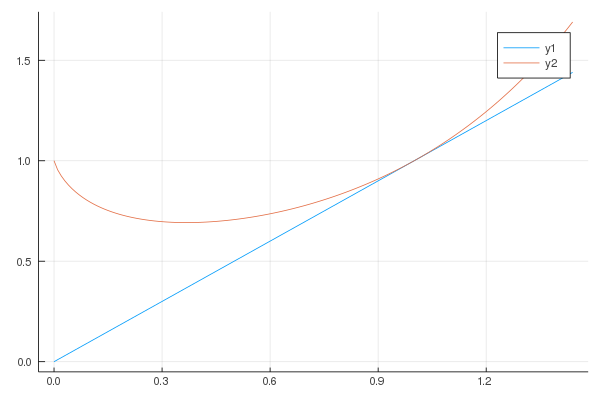

In [33]:
x=0:.01:k
y=[f(1,i) for i in x]
p1=plot(x,y)
y=[f(2,i) for i in x]
p2=plot!(x,y)

- $n=3,4$

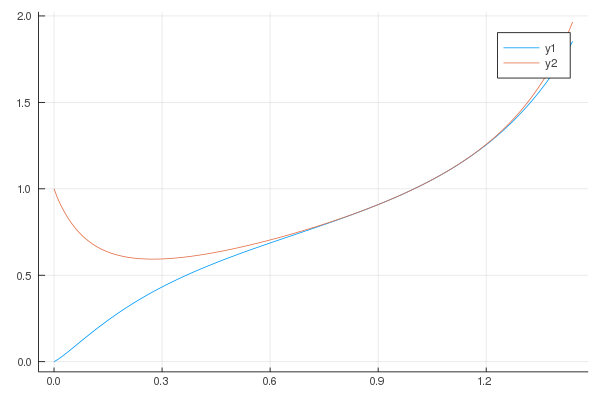

In [34]:
x=0:.01:k
y=[f(3,i) for i in x]
p3=plot(x,y)
y=[f(4,i) for i in x]
p4=plot!(x,y)

なんか，$n$の偶奇でグラフが違う。。。

- $n=5,6$

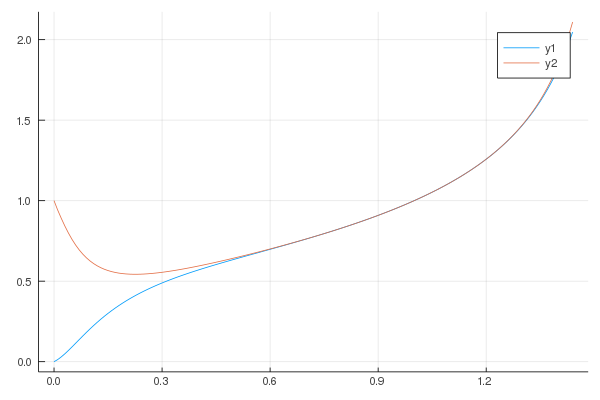

In [35]:
x=0:.01:k
y=[f(5,i) for i in x]
p5=plot(x,y)
y=[f(6,i) for i in x]
p6=plot!(x,y)


$x=0.6$あたりで合流して，後は一致していく感じです。

- $n=7,8$

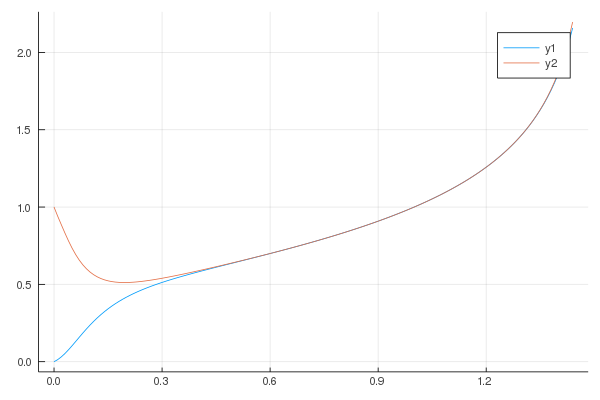

In [36]:
x=0:.01:k
y=[f(7,i) for i in x]
p7=plot(x,y)
y=[f(8,i) for i in x]
p8=plot!(x,y)

- $n=9,10$，後は$x=y^{\frac1y}$のグラフも重ねてみます。

In [39]:
s=1/exp(1)

0.36787944117144233

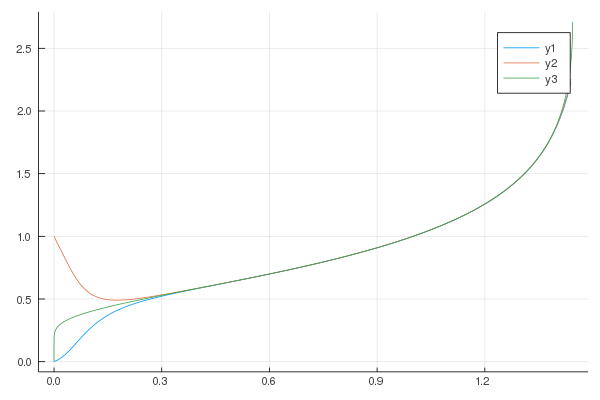

In [43]:
x=0:.01:k
y=[f(9,i) for i in x]
p9=plot(x,y)
y=[f(10,i) for i in x]
p10=plot!(x,y)

h(y)=y^(1/y)
y=0:.01:exp(1)
x=[h(i) for i in y]
h1=plot!(x,y)

まあ，x=0.3$あたりから重なっていくように見えます。

- $n=99,100$，$x=y^{\frac1y}$

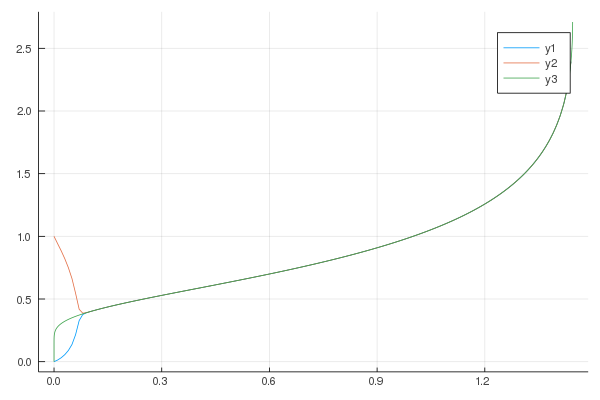

In [44]:
x=0:.01:k
y=[f(99,i) for i in x]
p99=plot(x,y)
y=[f(100,i) for i in x]
p100=plot!(x,y)

h(y)=y^(1/y)
y=0:.01:exp(1)
x=[h(i) for i in y]
h1=plot!(x,y)


$x=0.1$あたりから一致するようになった。これで良さそうなんだけど，そもそも$x=y^{\frac1y}$は原点か出発している。だけど，$n$が偶数の時は$(0,1)$
から出発している。このあたりはどう考えればいいのだろう？おそらく，$x=0$で$f(x)$は定義されないのではないかと考えます。

$$0^{0^{0^{0^{\cdots}}}}$$
は難しいですね。

#### 結論

$y=x^{x^{x^{x\cdots}}}$の定義域は$0<x\leqq e^{\frac1e}$でグラフは下の図のようになります。

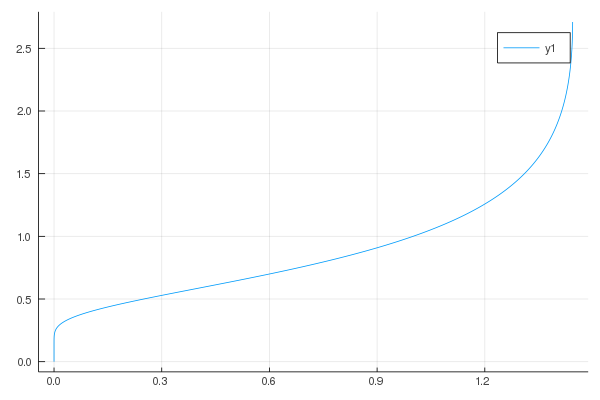

In [45]:
h(y)=y^(1/y)
y=0:.01:exp(1)
x=[h(i) for i in y]
h1=plot(x,y)